In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
brfss_data = h5py.File('brfss.hdf5', 'r')
brfss_data.keys()

<KeysViewHDF5 ['brfss']>

In [3]:
brfss = pd.read_hdf('brfss.hdf5', 'brfss')
brfss.head()

SEX   HTM4   WTKG3  INCOME2       _LLCPWT  _AGEG5YR  _VEGESU1  \
96230   2.0  160.0   60.33      8.0   1398.525290       6.0      2.14   
244920  2.0  163.0   58.97      5.0     84.057503      13.0      3.14   
57312   2.0  163.0   72.57      8.0    390.248599       5.0      2.64   
32573   2.0  165.0   74.84      1.0  11566.705300       3.0      1.46   
355929  2.0  170.0  108.86      3.0    844.485450       3.0      1.81   

        _HTMG10   AGE  
96230     150.0  47.0  
244920    160.0  89.5  
57312     160.0  42.0  
32573     160.0  32.0  
355929    160.0  32.0

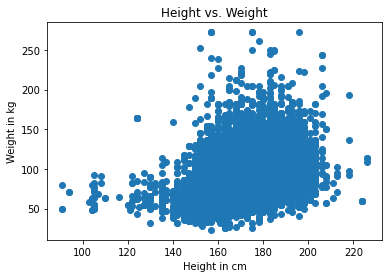

In [4]:
height = brfss['HTM4']
weight = brfss['WTKG3']

fig, ax = plt.subplots()
ax.scatter(height, weight)
ax.set(title='Height vs. Weight',
       xlabel='Height in cm',
       ylabel='Weight in kg')
plt.show()

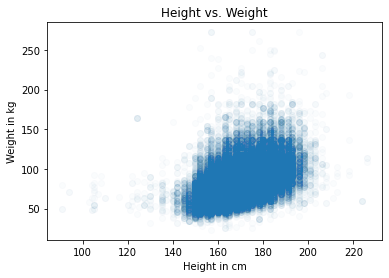

In [5]:
# adding transparency
fig, ax = plt.subplots()
ax.scatter(height, weight, alpha=.02)
ax.set(title='Height vs. Weight',
       xlabel='Height in cm',
       ylabel='Weight in kg')
plt.show()

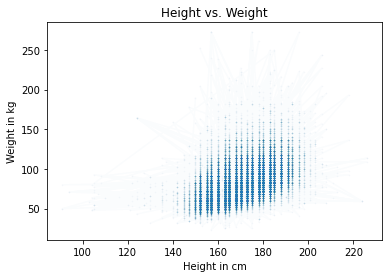

In [6]:
# marker size
fig, ax = plt.subplots()
ax.plot(height, weight, marker='o', markersize=1, alpha=.02)
ax.set(title='Height vs. Weight',
       xlabel='Height in cm',
       ylabel='Weight in kg')
plt.show()

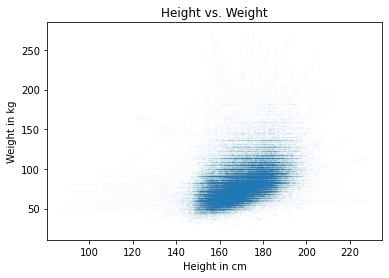

In [7]:
# Jittering
fig, ax = plt.subplots()
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
ax.plot(height_jitter, weight, marker='o', markersize=1, alpha=.02)
ax.set(title='Height vs. Weight',
       xlabel='Height in cm',
       ylabel='Weight in kg')
plt.show()

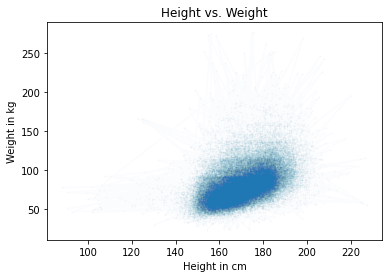

In [8]:
# More Jittering
fig, ax = plt.subplots()
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))
ax.plot(height_jitter, weight_jitter, marker='o', markersize=1, alpha=.02)
ax.set(title='Height vs. Weight',
       xlabel='Height in cm',
       ylabel='Weight in kg')
plt.show()

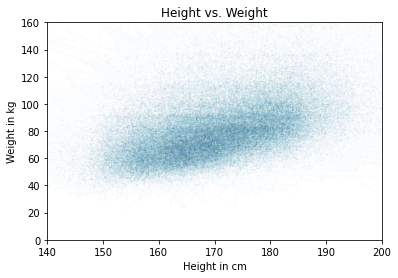

In [9]:
# zoom
fig, ax = plt.subplots()
ax.plot(height_jitter, weight_jitter, marker='o', markersize=1, alpha=.02)
ax.axis([140, 200, 0, 160])
ax.set(title='Height vs. Weight',
       xlabel='Height in cm',
       ylabel='Weight in kg')
plt.show()

## visualizing realationships

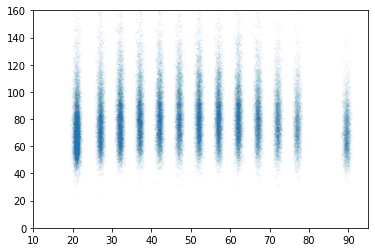

In [10]:
age = brfss['AGE']
fig, ax = plt.subplots()
age_jitter = age + np.random.normal(0, 0.5, size=len(brfss))
ax.plot(age_jitter, weight_jitter, 'o', markersize=1, alpha=.02)
ax.axis([10, 95, 0, 160])
plt.show()

### Violin Plot

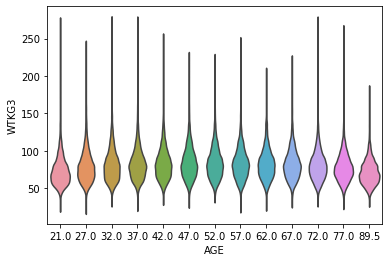

In [11]:
data = brfss.dropna(subset=['AGE', 'WTKG3'])
sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)
plt.show()

### Box plot

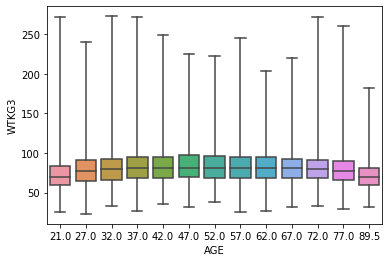

In [12]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.show()

#### for data that skews toward higher values, it is sometimes useful to look at it on a logarithmic scale...

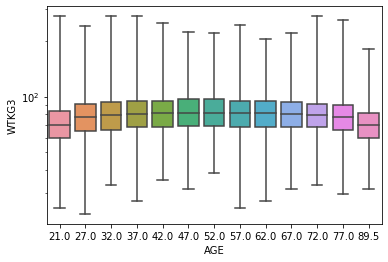

In [13]:
# Log scale
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')
plt.show()

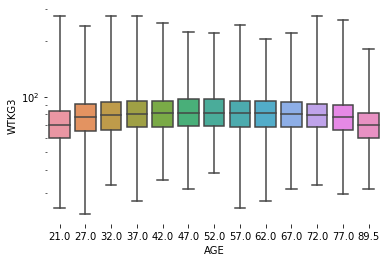

In [14]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')
# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.show()

In [15]:
brfss['INCOME2'].describe()

count    83447.000000
mean         5.788656
std          2.229189
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max          8.000000
Name: INCOME2, dtype: float64

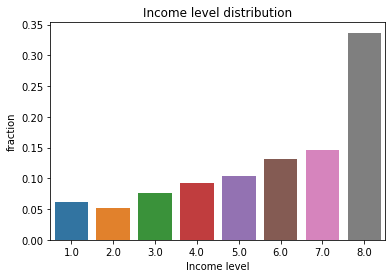

In [16]:
# Income
income = brfss['INCOME2']
# PMF of income
fig, ax = plt.subplots()
prob = income.value_counts(normalize=True)
sns.barplot(x=prob.index, y=prob.values, ax=ax)
ax.set(title='Income level distribution',
       xlabel='Income level',
       ylabel='fraction')
plt.show()

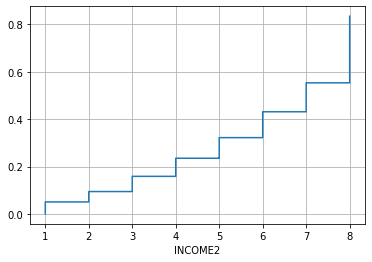

In [17]:
# CDF
inc = income.sort_values()

# append again the last (and largest) value to get an unbiased CDF
inc[len(inc)] = inc.iloc[-1]
cum_inc = np.linspace(0., 1., len(inc))
inc_cdf = pd.Series(cum_inc, index=inc)

fig, ax = plt.subplots()
inc_cdf.plot(drawstyle='steps', ax=ax)
ax.grid()
plt.show()

Almost half of the respondents are in the top income category.
So this dataset doesn't distinguish between the highest incomes and the median. But maybe it can tell us something about people with incomes below the median

### Relationship between Income and height

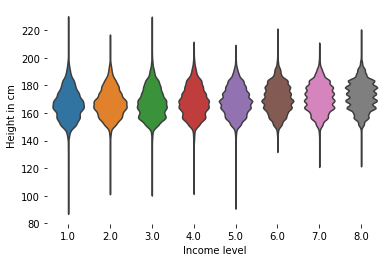

In [18]:
data = brfss.dropna(subset=['INCOME2', 'HTM4'])
sns.violinplot(x='INCOME2', y='HTM4', data=data, inner=None)
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

it looks like there is a weak positive relationship between income and height, at least for incomes below the median.

# Correlation

In [19]:
# correlation between height, weight & age
cols = ['HTM4', 'WTKG3', 'AGE']
subset = brfss[cols]
subset.corr()

HTM4     WTKG3       AGE
HTM4   1.000000  0.474203 -0.093684
WTKG3  0.474203  1.000000  0.021641
AGE   -0.093684  0.021641  1.000000

## Simple regression

In [20]:
from scipy.stats import linregress

In [21]:
data = brfss.dropna(subset=['HTM4', 'WTKG3'])
res = linregress(data.HTM4, data.WTKG3)
res

LinregressResult(slope=0.9192115381848305, intercept=-75.12704250330248, rvalue=0.4742030897902462, pvalue=0.0, stderr=0.005632863769802998)

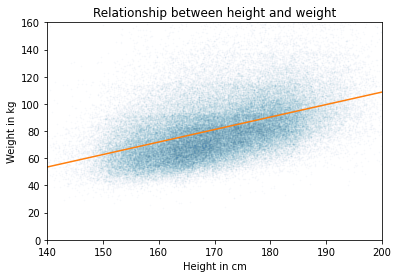

In [22]:
xs = data.HTM4
ys = data.WTKG3
xs_jit = xs + np.random.normal(0, 2, size=len(data))
ys_jit = ys + np.random.normal(0, 2, size=len(data))
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
fig, ax = plt.subplots()
ax.plot(xs_jit, ys_jit , 'o', markersize=1, alpha=0.02)
plt.plot(fx, fy, '-')
ax.axis([140, 200, 0, 160])
ax.set(title='Relationship between height and weight',
       xlabel='Height in cm',
       ylabel='Weight in kg')
plt.show()

### Limits of simple regression

In [23]:
brfss.columns

Index(['SEX', 'HTM4', 'WTKG3', 'INCOME2', '_LLCPWT', '_AGEG5YR', '_VEGESU1',
       '_HTMG10', 'AGE'],
      dtype='object')

In [24]:
data1 = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs1 = data1['INCOME2']
ys1 = data1['_VEGESU1']


In [25]:
res1 = linregress(xs1, ys1)
res1

LinregressResult(slope=0.06988048092105019, intercept=1.5287786243363106, rvalue=0.11967005884864107, pvalue=1.378503916247615e-238, stderr=0.002110976356332332)

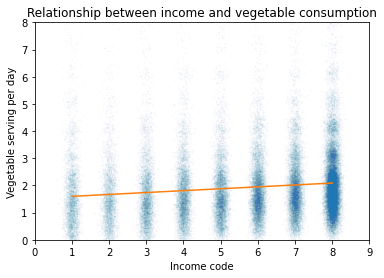

In [26]:
xs1_jit = xs1 + np.random.normal(0, .1, size=len(data1))
ys1_jit = ys1 + np.random.normal(0, .1, size=len(data1))
fx1 = np.array([xs1.min(), xs1.max()])
fy1 = res1.intercept + res1.slope * fx1
fig, ax = plt.subplots()
ax.plot(xs1_jit, ys1_jit , 'o', markersize=1, alpha=0.02)
plt.plot(fx1, fy1, '-')
ax.axis([0, 9, 0, 8])
ax.set(title='Relationship between income and vegetable consumption',
       xlabel='Income code',
       ylabel='Vegetable serving per day')
plt.show()

#### Note: regression is not symmetric

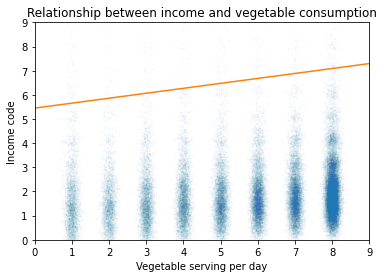

In [27]:
res2 = linregress(ys1, xs1)
xs1_jit = xs1 + np.random.normal(0, .1, size=len(data1))
ys1_jit = ys1 + np.random.normal(0, .1, size=len(data1))
fx2 = np.array([ys1.min(), ys1.max()])
fy2 = res2.intercept + res2.slope * fx2
fig, ax = plt.subplots()
ax.plot(xs1_jit, ys1_jit , 'o', markersize=1, alpha=0.02)
plt.plot(fx2, fy2, '-')
ax.axis([0, 9, 0, 9])
ax.set(title='Relationship between income and vegetable consumption',
       ylabel='Income code',
       xlabel='Vegetable serving per day')
plt.show()

In [28]:
res2

LinregressResult(slope=0.2049345224314749, intercept=5.450700189148757, rvalue=0.11967005884864107, pvalue=1.378503916247615e-238, stderr=0.006190740615220712)

#### Note: regression doesn't tell much about causation.

## Multiple regression

In [29]:
import statsmodels.formula.api as smf

In [30]:
results = smf.ols('INCOME2 ~ _VEGESU1', data=brfss).fit()
results.params

Intercept    5.450700
_VEGESU1     0.204935
dtype: float64

In [31]:
gss = pd.read_hdf('gss.hdf5', 'gss')
gss.columns

Index(['year', 'age', 'cohort', 'sex', 'race', 'educ', 'realinc', 'gunlaw',
       'grass', 'wtssall'],
      dtype='object')

In [32]:
model = smf.ols('realinc ~ educ', data=gss)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                realinc   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     8324.
Date:                Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:12:46   Log-Likelihood:            -6.4726e+05
No. Observations:               55417   AIC:                         1.295e+06
Df Residuals:                   55415   BIC:                         1.295e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.154e+04    521.343    -22.133      0.000   -1.26e+04   -1.05e+04
educ        3586.5237     39.310     91.237      0.000    3509.476    3663.571
==============================================================================
Omnibus:                    17218.629   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48759.958
Skew:                           1.659   Prob(JB):                         0.00
Kurtosis:                       6.179   Cond. No.                         57.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
res.params

Intercept   -11539.147837
educ          3586.523659
dtype: float64

additional education increases salary by 3585 USD. Age also has some influence over income...

In [34]:
results = smf.ols('realinc ~ educ + age', data=gss).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                realinc   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     4235.
Date:                Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:12:46   Log-Likelihood:            -6.4634e+05
No. Observations:               55345   AIC:                         1.293e+06
Df Residuals:                   55342   BIC:                         1.293e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.612e+04    657.350    -24.519      0.000   -1.74e+04   -1.48e+04
educ        3655.1669     39.726     92.010      0.000    3577.304    3733.030
age           83.7318      7.384     11.340      0.000      69.259      98.205
==============================================================================
Omnibus:                    17077.185   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48050.400
Skew:                           1.650   Prob(JB):                         0.00
Kurtosis:                       6.154   Cond. No.                         264.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### looking at income and age...

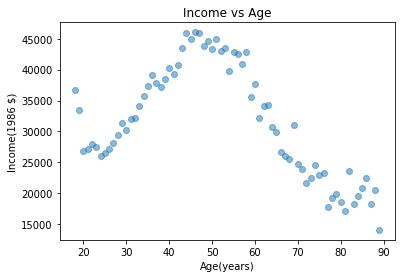

In [35]:
grp = gss.groupby('age')
mean_inc_by_age = grp['realinc'].mean()

fig, ax = plt.subplots()
ax.plot(mean_inc_by_age, 'o', alpha=0.5)
ax.set(title='Income vs Age', xlabel='Age(years)', ylabel='Income(1986 $)')
plt.show()

### Adding a quadratic term

In [36]:
gss['age2'] = gss['age'] ** 2

In [38]:
model = smf.ols('realinc ~ educ + age + age2', data=gss)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                realinc   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     3533.
Date:                Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:14:45   Log-Likelihood:            -6.4543e+05
No. Observations:               55345   AIC:                         1.291e+06
Df Residuals:                   55341   BIC:                         1.291e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.806e+04    985.324    -48.775      0.000      -5e+04   -4.61e+04
educ        3442.4472     39.392     87.389      0.000    3365.238    3519.656
age         1748.2326     39.416     44.353      0.000    1670.976    1825.489
age2         -17.4376      0.406    -42.965      0.000     -18.233     -16.642
==============================================================================
Omnibus:                    17634.223   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51941.449
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                       6.344   Cond. No.                     2.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Visualizing regression results

In [39]:
gss['educ2'] = gss['educ'] ** 2
formula = 'realinc ~ educ + educ2 + age + age2'
model = smf.ols(formula, data=gss)
results = model.fit()
results.params

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64

### Generating predictions

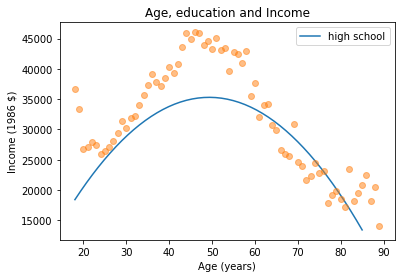

In [41]:
df = pd.DataFrame()
df['age'] = np.linspace(18, 85)
df['age2'] = df.age ** 2

df['educ'] = 12
df['educ2'] = df.educ ** 2

pred12 = results.predict(df)

# plotting predictions
fig, ax = plt.subplots()
ax.plot(df.age, pred12, label='high school')
ax.plot(mean_inc_by_age, 'o', alpha=0.5)
ax.set(title="Age, education and Income",
       xlabel='Age (years)',
       ylabel='Income (1986 $)')
ax.legend()
plt.show()

#### Levels of education

In [42]:
def levels_of_educ_and_mean_inc(ed_level=[12, 14, 16], labels=['high school', 'associates', 'bachelor']):
    df = pd.DataFrame()
    df['age'] = np.linspace(18, 85)
    df['age2'] = df.age ** 2
    
    fig, ax = plt.subplots()
    
    for i in range(len(labels)):
        df['educ'] = ed_level[i]
        df['educ2'] = df.educ ** 2
        preds = results.predict(df)
        ax.plot(df.age, preds, label=labels[i])
    ax.plot(mean_inc_by_age, 'o', alpha=0.5, label='real income')
    ax.set(title="Age, education and Income",
           xlabel='Age (years)',
           ylabel='Income (1986 $)')
    ax.legend()
    plt.show()

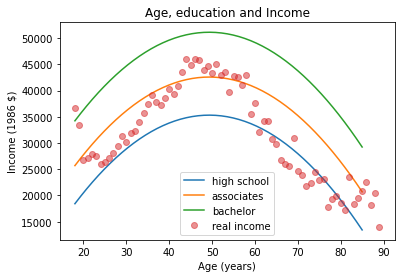

In [43]:
levels_of_educ_and_mean_inc()

## Logistic regression

In [44]:
gss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62466 entries, 0 to 62465
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     62466 non-null  int64  
 1   age      62281 non-null  float64
 2   cohort   62282 non-null  float64
 3   sex      62466 non-null  int64  
 4   race     62466 non-null  int64  
 5   educ     62304 non-null  float64
 6   realinc  55499 non-null  float64
 7   gunlaw   40550 non-null  float64
 8   grass    36222 non-null  float64
 9   wtssall  62466 non-null  float64
 10  age2     62281 non-null  float64
 11  educ2    62304 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 6.2 MB


In [45]:
cat_cols = ['sex', 'race']
for col in cat_cols:
    gss[col] = gss[col].astype('category')

In [46]:
gss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62466 entries, 0 to 62465
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   year     62466 non-null  int64   
 1   age      62281 non-null  float64 
 2   cohort   62282 non-null  float64 
 3   sex      62466 non-null  category
 4   race     62466 non-null  category
 5   educ     62304 non-null  float64 
 6   realinc  55499 non-null  float64 
 7   gunlaw   40550 non-null  float64 
 8   grass    36222 non-null  float64 
 9   wtssall  62466 non-null  float64 
 10  age2     62281 non-null  float64 
 11  educ2    62304 non-null  float64 
dtypes: category(2), float64(9), int64(1)
memory usage: 5.4 MB


### Sex and income

In [47]:
formula = 'realinc ~ educ + educ2 + age + age2 + C(sex)'
results = smf.ols(formula, data=gss).fit()
results.params

Intercept     -22369.453641
C(sex)[T.2]    -4156.113865
educ            -310.247419
educ2            150.514091
age             1703.047502
age2             -17.238711
dtype: float64

In [48]:
# Boolean variable
gss['gunlaw'].value_counts()

1.0    30918
2.0     9632
Name: gunlaw, dtype: int64

In [49]:
gss['gunlaw'].replace([2], [0], inplace=True)
gss['gunlaw'].value_counts()

1.0    30918
0.0     9632
Name: gunlaw, dtype: int64

In [50]:
formula = 'gunlaw ~ educ + educ2 + age + age2 + C(sex)'
results = smf.logit(formula, data=gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


Intercept      1.653862
C(sex)[T.2]    0.757249
educ          -0.124373
educ2          0.006653
age           -0.018849
age2           0.000189
dtype: float64

#### Generating predictions

In [52]:
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['educ'] = 12

df['age2'] = df.age ** 2
df['educ2'] = df.educ ** 2

df['sex'] = 1
pred1 = results.predict(df)
df['sex'] = 2
pred2 = results.predict(df)

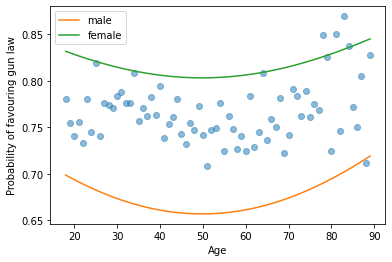

In [53]:
# visulizing results
grpd = gss.groupby('age')
favor_by_age = grpd['gunlaw'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df.age, pred1, label='male')
plt.plot(df.age, pred2, label='female')

plt.xlabel('Age')
plt.ylabel('Probability of favouring gun law')
plt.legend()
plt.show()